# Lab 1

In [4]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## calibration measurements 
Using test 2 config settings
* Cs-137
    - 10 minutes (600 seconds)
* Co-60
    - 10 minutes (600 seconds)
* Co-57
    - 10 minutes (600 seconds)

In [5]:
f_name = 'data/cs137.h5'
f_data = h5py.File(f_name,'r')
cs137 = f_data['raw_data'][()]
print(cs137.shape)
# invert pulses false, 500 trigger delay, 120 trigger threshold
f_name = 'data/co60.h5'
f_data = h5py.File(f_name,'r')
co60 = f_data['raw_data'][()]
print(co60.shape)

f_name = 'data/co57.h5'
f_data = h5py.File(f_name,'r')
co57 = f_data['raw_data'][()]
print(co57.shape)

(5410, 50000)
(5396, 50000)
(6046, 50000)


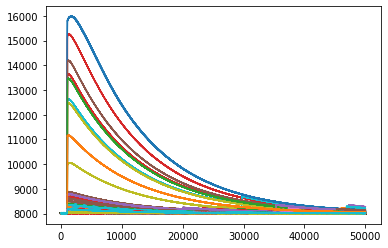

In [6]:
plt.figure()
for i in range(len(cs137)):
    plt.plot(cs137[i])
plt.show()

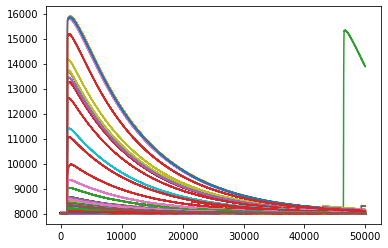

In [7]:
plt.figure()
for i in range(len(co60)):
    plt.plot(co60[i])
plt.show()

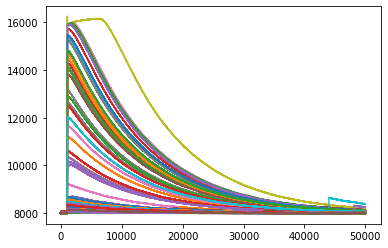

In [8]:
plt.figure()
for i in range(len(co57)):
    plt.plot(co57[i])
plt.show()

## random subset of pulses

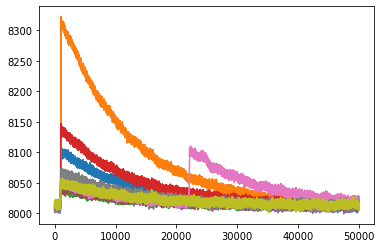

In [9]:
# plot random pulses
plt.figure()
for i in range(9):
    n = int(np.random.rand()*len(cs137))
    plt.plot(cs137[n])
plt.show()

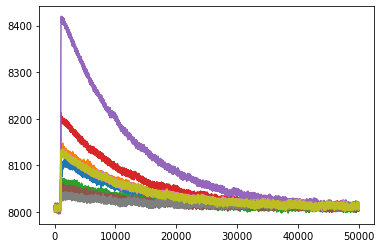

In [10]:
# plot random pulses
plt.figure()
for i in range(9):
    n = int(np.random.rand()*len(co60))
    plt.plot(co60[n])
plt.show()

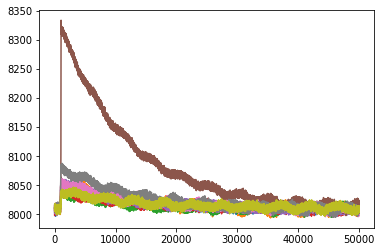

In [11]:
# plot random pulses
plt.figure()
for i in range(9):
    n = int(np.random.rand()*len(co57))
    plt.plot(co57[n])
plt.show()